In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Reto 2

Resuelve de nuevo el problema del titanic hasta llegar a un modelo final.

Obten las probabilidades de supervivencia en el test set.

In [3]:
#Abrimos dataset
titanic_machine = pd.read_csv("titanic_machine.csv")

#Division test y train
X, y = titanic_machine[titanic_machine.columns[-12:]], titanic_machine["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Entrenamos el modelo
clf = SVC(probability=True)
clf.fit(X_train, y_train)

#Calculamos predicciones
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

y_test_prob = clf.predict_proba(X_test)
y_train_prob = clf.predict_proba(X_train)

print(f'Probabilidades de supervivencia en test: {y_test_prob[:, 1]}')

Probabilidades de supervivencia en test: [0.6312755  0.31275068 0.3284917  0.31003262 0.54008733 0.37306052
 0.30066632 0.71950455 0.31135053 0.34220677 0.30941083 0.36000078
 0.31627086 0.30124191 0.41072531 0.78588112 0.74161426 0.3127106
 0.32272002 0.33080713 0.30686445 0.35824131 0.48649634 0.77397713
 0.5        0.77869836 0.3439482  0.38076264 0.70775043 0.65427456
 0.77423791 0.30089313 0.31075009 0.76537734 0.30858395 0.60457543
 0.4431716  0.34834537 0.75962722 0.63465834 0.31045901 0.71704475
 0.43798449 0.31627457 0.32920634 0.57538652 0.35679225 0.31947158
 0.32737969 0.31112519 0.30417076 0.5        0.30946148 0.40136442
 0.36341013 0.31601157 0.34030531 0.31920495 0.30355165 0.36319322
 0.44353776 0.77555749 0.75660911 0.79222548 0.4381359  0.31221869
 0.44366672 0.40983414 0.3137439  0.5838637  0.2984148  0.34850374
 0.31275068 0.3284917  0.30405298 0.52395011 0.38945798 0.31113976
 0.76769501 0.30134434 0.3109015  0.30693863 0.31227659 0.3047659
 0.38505116 0.31862618 

In [3]:
mean = np.mean(y_test_prob[:, 1])
print(f'Probabilidad de supervivencia en test: {mean:.2%}')

Probabilidad de supervivencia en test: 40.45%


##### A)
Realiza dos histogramas que contengan:
- probabilidad de la prediccion de supervivencia de los pasajeros que realmente sobrevivieron (rojo)
- probabilidad de la prediccion de supervivencia de los pasajeros que realmente NO sobrevivieron (azul)

Muestra esa informacion en un mismo grafico, superponiendo los dos anteriores.

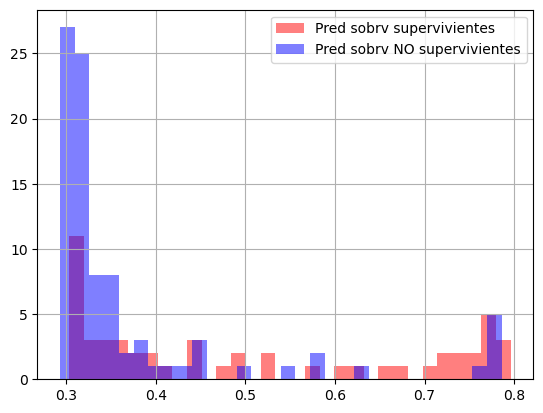

In [4]:
#Almacenamos datos Probabilidad si sobrevivieron:
prob_si = []
#almacenar_datos_prob_reales('rojo')
prob_si = y_test_prob[y_test == 1,1]

#Almacenamos datos Probabilidad no sobrevivieron:
prob_no = []
#almacenar_datos_prob_reales('azul')
prob_no = y_test_prob[y_test == 0,1]

#Realizamos histograma
plt.hist(prob_si, bins=30, color= 'red', label='Pred sobrv supervivientes', alpha= 0.5)
plt.hist(prob_no, bins=30, color= 'blue', label='Pred sobrv NO supervivientes', alpha= 0.5)
plt.legend()
plt.grid()

##### B)
Realiza el grafico que hemos visto en clase, variando el umbral y mostrando como varia la precision, el recall y el f1_score.

In [9]:
df = pd.DataFrame()
def crear_df_metricas(v):
    for i in v:
        umbral = i/10
        metricas = []
        metricas.append(precision_score(y_test, y_test_prob[:, 1] > umbral))
        metricas.append(recall_score(y_test, y_test_prob[:, 1] > umbral))
        metricas.append(f1_score(y_test, y_test_prob[:, 1] > umbral))
        df['Metricas '+str(umbral)]=metricas
    df['Metrica']=['Precision','Recall','F1']
    df.set_index(['Metrica'], inplace=True)
    

,Metricas 0.2,Metricas 0.4,Metricas 0.5,Metricas 0.6,Metricas 0.7
Metrica,,,,,
Precision,0.349650,0.547619,0.575758,0.789474,0.846154
Recall,1.000000,0.460000,0.380000,0.300000,0.220000
F1,0.518135,0.500000,0.457831,0.434783,0.349206


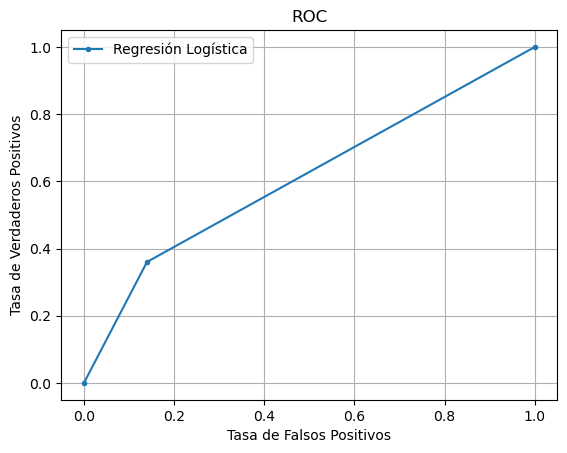

In [14]:
from sklearn.metrics import roc_curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_test_pred)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.grid()
plt.legend()
plt.title('ROC')

crear_df_metricas([2,4,5,6,7])
df

In [ ]:
#Funcion para almacenar probabilidades cruzadas: 
    
def almacenar_datos_prob_reales(x):
    if x == 'rojo':
        for i in y_test:
            for j in y_test_prob[:, 1]:
                if i == 1: prob_si.append(j)
    elif x == 'azul':
        for i in y_test:
            for j in y_test_prob[:, 1]:
                if i == 0: prob_no.append(j)